In [51]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras import Sequential
import numpy as np
import matplotlib.pyplot as plt


In [52]:
training = "/content/pet_images/train_dataset"
test = "/content/pet_images/test_dataset"

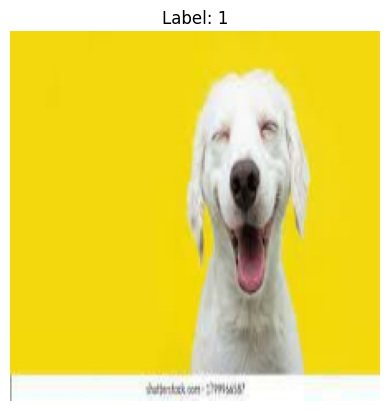

In [53]:
for images, labels in train_dataset.take(1):  # `take(1)` gets the first batch
    image = images[0]  # Get the first image from the batch
    label = labels[0]  # Get the label of that image

# Undo normalization (if done previously) by multiplying by 255
image = image * 255.0

# Plot the image
plt.imshow(image.numpy().astype("uint8"))  # Convert tensor to numpy array and ensure the data type is uint8 for displaying
plt.title(f"Label: {label.numpy()}")  # Show the label
plt.axis('off')  # Hide the axes for better visualization
plt.show()

In [54]:


# Load the train dataset with a validation split (use 80% for training, 20% for validation)
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training,
    image_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    label_mode='int',  # Label mode is integer (for sparse categorical cross-entropy)
    validation_split=0.2,  # 20% of data for validation
    subset='training',  # Use the training split
    seed=123
)
# Load the validation dataset (20% from the training split)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    validation_split=0.2,
    subset='validation',  # Use the validation split
    seed=123
)
# Load the test dataset (no validation_split used for test set)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test,
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',  # Label mode is integer (for sparse categorical cross-entropy)
    seed=123
)

# Normalize the pixel values to be between 0 and 1
train_dataset = train_dataset.map(lambda x, y: (x / 255.0, y))
val_dataset = val_dataset.map(lambda x, y: (x / 255.0, y))
test_dataset = test_dataset.map(lambda x, y: (x / 255.0, y))

# Prefetch data for better performance
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.prefetch(tf.data.experimental.AUTOTUNE)


Found 27 files belonging to 2 classes.
Using 22 files for training.
Found 27 files belonging to 2 classes.
Using 5 files for validation.
Found 30 files belonging to 2 classes.


In [55]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),

    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Adjust this number to match your number of classes
])

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,  # Use the validation set defined earlier
    epochs=10
)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │       2,769,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,789,706 (10.64 MB)

 Trainable params: 2,789,706 (10.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 2.2837 - val_accuracy: 0.6000 - val_loss: 0.7262
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5455 - loss: 0.7309 - val_accuracy: 0.4000 - val_loss: 2.2519
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.4545 - loss: 2.1679 - val_accuracy: 0.6000 - val_loss: 1.2468
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.5455 - loss: 1.1359 - val_accuracy: 0.6000 - val_loss: 1.1757
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.5455 - loss: 1.0070 - val_accuracy: 0.6000 - val_loss: 0.7238
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.5455 - loss: 0.5823 - val_accuracy: 0.4000 - val_loss: 0.7096
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.8182 - loss: 0.5833 - val_accuracy: 0.4000 - val_loss: 0.7904
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.5909 - loss: 0.6473 - val_accuracy: 0.4000 - val_loss: 0

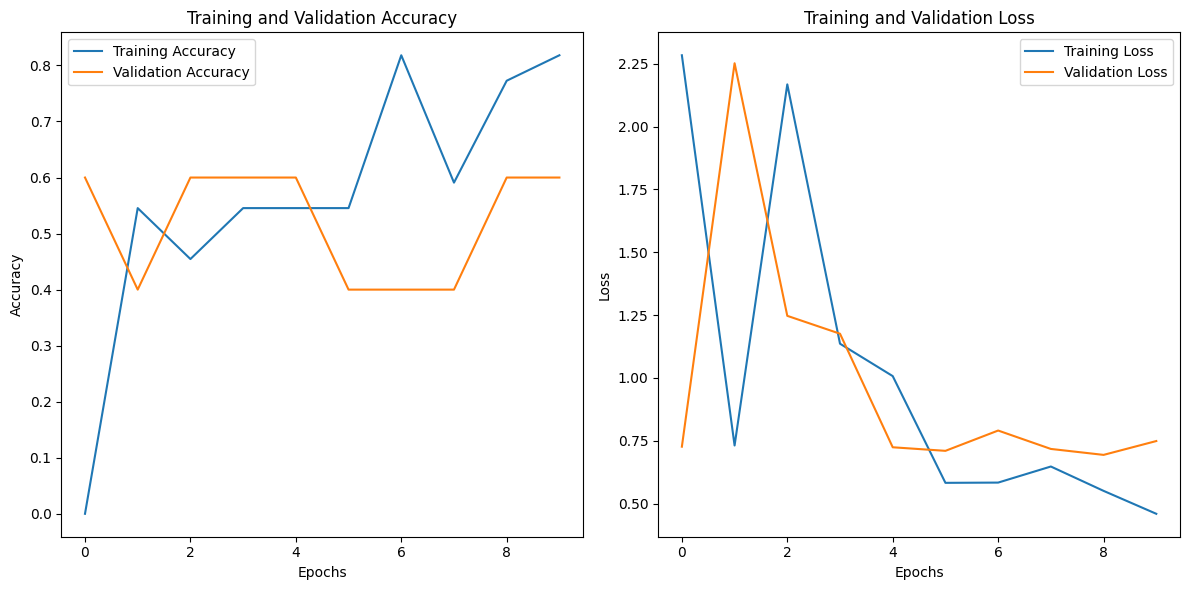

In [56]:
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()